## DATA PREPROCESSING

In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import logging
logging.captureWarnings(True) 
pd.set_option('display.max_columns',None)
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')


train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [632]:
# saving id of test data for submission purpose
Id = test['Id']

In [633]:
print(train.shape)
test.shape
# We have 81 columns including target variable.

(1460, 81)


(1459, 80)

In [634]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [635]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Dealing with null values and outliers

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


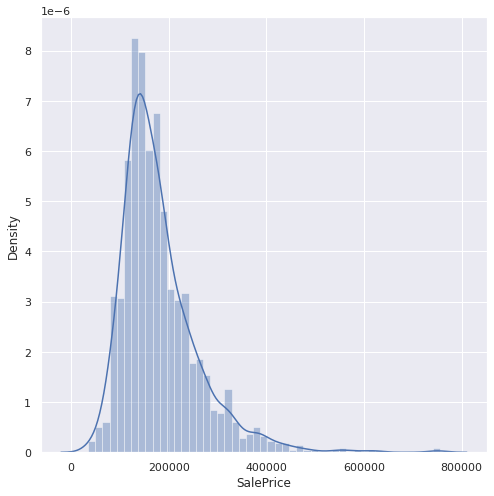

In [636]:
# Outliers in target variable

sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(train.SalePrice)

print(train.SalePrice.describe())

In [637]:
# Records that are in 99 percentile price range
p99 = np.percentile(train.SalePrice,99)
train.loc[train.SalePrice>p99,['Neighborhood','OverallQual','OverallCond','SalePrice']]

,Neighborhood,OverallQual,OverallCond,SalePrice
178,StoneBr,9,5,501837
185,OldTown,10,9,475000
440,NridgHt,10,5,555000
527,NridgHt,9,5,446261
591,NridgHt,10,5,451950
691,NoRidge,10,6,755000
769,StoneBr,8,5,538000
798,NridgHt,9,5,485000
803,NridgHt,9,5,582933
898,NridgHt,9,5,611657


In [638]:
# capping them by subtracting 1.2 times std() from those outliers
train.loc[train.SalePrice>650000,'SalePrice'] = train.loc[train.SalePrice>650000,'SalePrice'] -int(train.SalePrice.std()*1.2) 

In [639]:
total_data = pd.concat([train.drop(columns='SalePrice'),test],axis='rows')
total_data.isna().sum().sort_values(ascending=False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
Exterior2nd        1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

In [640]:
del train['PoolQC']
del train['MiscFeature']
del train['Alley']
del train['Fence']

del test['PoolQC']
del test['MiscFeature']
del test['Alley']
del test['Fence']

del total_data['PoolQC']
del total_data['MiscFeature']
del total_data['Alley']
del total_data['Fence']

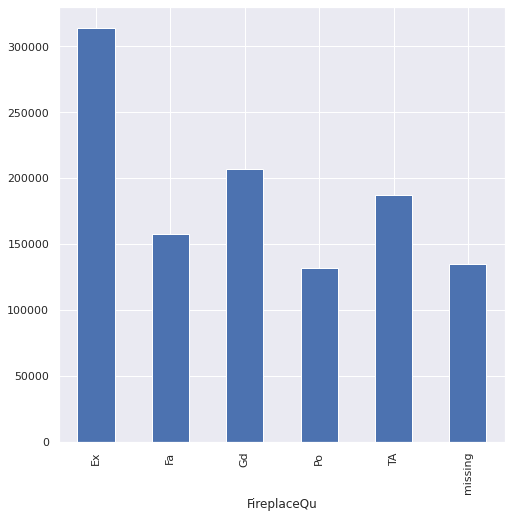

missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu, dtype: int64


In [641]:
# For 'FireplaceQu' ....
plt.figure(figsize = (8,8))
temp = train.copy()
temp['FireplaceQu'] = temp['FireplaceQu'].fillna('missing')
temp.groupby('FireplaceQu')['SalePrice'].median().plot.bar()
plt.show()

print(temp['FireplaceQu'].value_counts())

# Since the median price of houses with missing values fall near that of houses with poor fireplace,
# we are assumming that rest of the values are 'NA' : No Fireplace.
# Thus we will be keeping this variable

In [642]:
# filling null values with NA catagory
train['FireplaceQu'] = train['FireplaceQu'].fillna('NA')
test['FireplaceQu'] = test['FireplaceQu'].fillna('NA')

In [643]:
temp = total_data.isna().sum()

# Columns with null values
na_columns = temp[temp>0].index.values

print(temp.sort_values(ascending=False).head(29))

na_columns

FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
SaleType           1
Exterior2nd        1
Exterior1st        1
Electrical         1
TotalBsmtSF        1
GarageCars         1
KitchenQual        1
dtype: int64


array(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype=object)

##### Looking into null values in numerical variables first

In [644]:
# Numerical columns with null values
numerical_na = total_data[na_columns].select_dtypes(include='number').columns.values

In [645]:
print(total_data[numerical_na].isna().sum())
train[numerical_na]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64


,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706,0,150,856,1,0,2003.0,2,548
1,80.0,0.0,978,0,284,1262,0,1,1976.0,2,460
2,68.0,162.0,486,0,434,920,1,0,2001.0,2,608
3,60.0,0.0,216,0,540,756,1,0,1998.0,3,642
4,84.0,350.0,655,0,490,1145,1,0,2000.0,3,836
...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0.0,0,0,953,953,0,0,1999.0,2,460
1456,85.0,119.0,790,163,589,1542,1,0,1978.0,2,500
1457,66.0,0.0,275,0,877,1152,0,0,1941.0,1,252
1458,68.0,0.0,49,1029,0,1078,1,0,1950.0,1,240


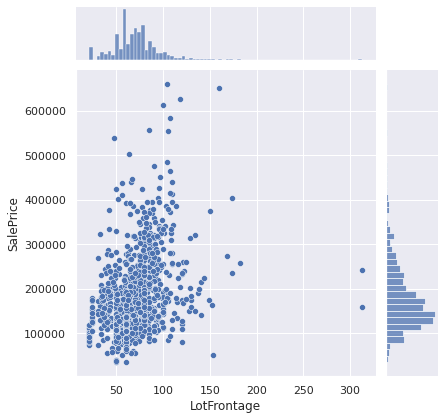

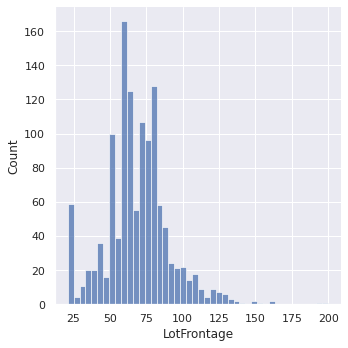

In [646]:
## LotFrontage
sns.jointplot(train.LotFrontage,train.SalePrice)
sns.displot(test.LotFrontage)

# Removing outliers by replacing it with 6*(std of LotFrontage)
train.loc[train.LotFrontage>250,'LotFrontage']= train.LotFrontage.std()

# Replacing null values with median
train['LotFrontage'].fillna(train.LotFrontage.median(),inplace=True)
test['LotFrontage'].fillna(test.LotFrontage.median(),inplace=True)
total_data['LotFrontage'].fillna(total_data.LotFrontage.median(),inplace=True)


58      1031.0
70      1115.0
115     1129.0
224      922.0
297     1600.0
349      870.0
517      921.0
691     1170.0
755      894.0
798      860.0
808     1047.0
825      816.0
981      975.0
1169    1378.0
1298     796.0
Name: MasVnrArea, dtype: float64


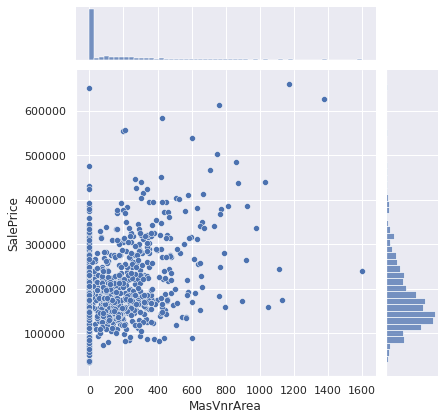

In [647]:
## MasVnrArea
sns.jointplot((train.MasVnrArea),train.SalePrice)

# removing outliers by replaceing it with value of 6*(std of MasVnrArea)
p99 = np.percentile(train.MasVnrArea.dropna(axis=0),99)
print(train.loc[train.MasVnrArea>p99,'MasVnrArea'])

train.loc[[297,1169],'MasVnrArea'] = train.MasVnrArea.std()*6

# replacing missing values
train.MasVnrArea.fillna(0,inplace=True)
test.MasVnrArea.fillna(0,inplace=True)


In [648]:
# Only one missing value. therefore  replacing it with median or mean
test.BsmtFinSF2.fillna(test.BsmtFinSF2.median(),inplace=True)
test.BsmtFinSF1.fillna(test.BsmtFinSF1.median(),inplace=True)
test.BsmtUnfSF.fillna(test.BsmtUnfSF.median(),inplace=True)
test.TotalBsmtSF.fillna(test.TotalBsmtSF.mean(),inplace=True)


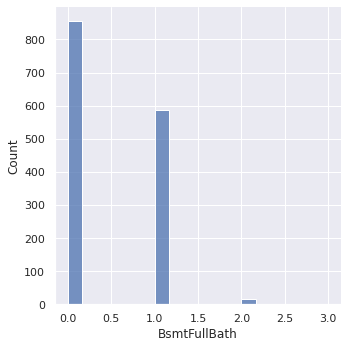

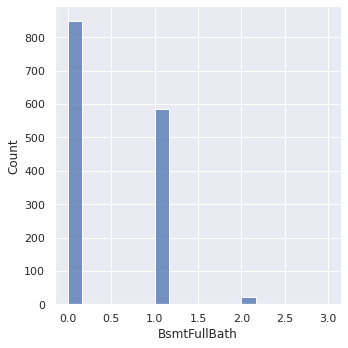

In [649]:
# for BsmtFullBath..
sns.displot(train.BsmtFullBath)
sns.displot(test.BsmtFullBath)

# value 2 occur very little times. This variable represents number of bathrooms in basement,
# so, we will replace it with 1 as its the most practical value to be replacing it with. 
train.loc[train.BsmtFullBath==2,'BsmtFullBath']=1
test.loc[test.BsmtFullBath==2,'BsmtFullBath']=1

# filling missing values
test.BsmtFullBath.fillna(0,inplace=True)


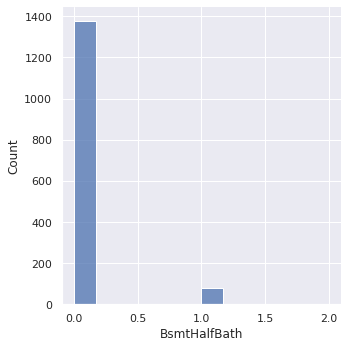

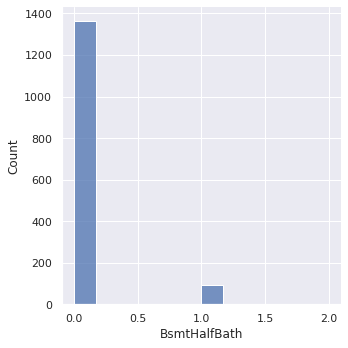

In [650]:
# for BsmtHalfBath

sns.displot(train.BsmtHalfBath)
sns.displot(test.BsmtHalfBath)

# similar case like BsmtFullBath
train.loc[train.BsmtHalfBath==2,'BsmtHalfBath']=1
test.loc[test.BsmtHalfBath==2,'BsmtHalfBath']=1

# filling missing values
test.BsmtHalfBath.fillna(0,inplace=True)


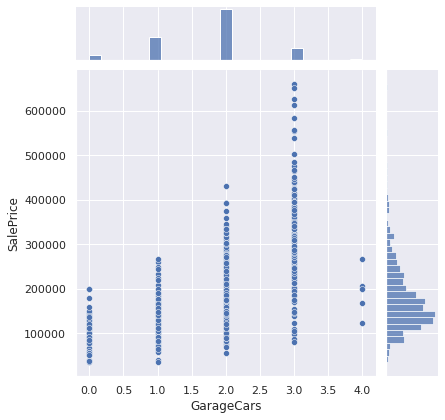

In [651]:
# for GarageCars
sns.jointplot(train.GarageCars,train.SalePrice)

# filling missing values
test.GarageCars.fillna(2,inplace=True)

# similar case like BsmtFullBath
train.loc[train.GarageCars==4,'GarageCars']=3
test.loc[test.GarageCars==4,'GarageCars']=3


1116    2.0
Name: GarageCars, dtype: float64 

GarageCars
0      0.000000
1    300.517615
2    519.047330
3    802.865591
Name: GarageArea, dtype: float64


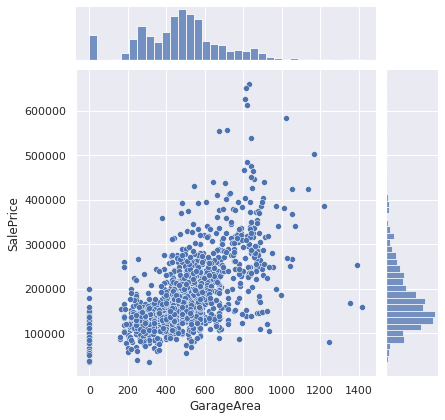

In [652]:
# for GarageArea....
sns.jointplot(train.GarageArea,train.SalePrice)

# Removing outliers
train.loc[train.GarageArea>1200,'GarageArea']= 800
test.loc[test.GarageArea>1200,'GarageArea'] =800


# Comapring GarageCars and GarageArea

print(test.loc[test.GarageArea.isna(),'GarageCars'],'\n')

gb = train.groupby('GarageCars')['GarageArea'].mean()
print(gb)

# Replacing GarageArea with a value that corresponds to a garage with 2 cars
test.GarageArea.fillna(518,inplace=True)


<AxesSubplot:xlabel='GarageCars'>

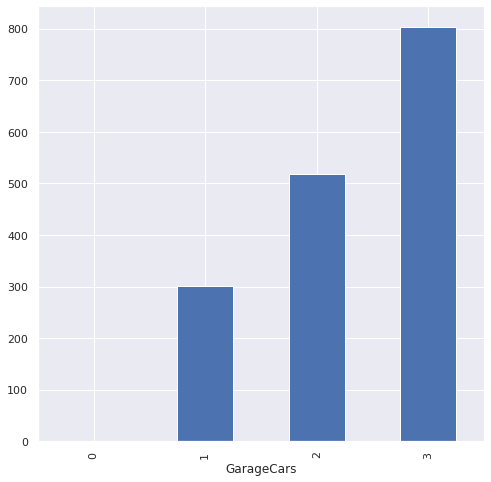

In [653]:
# plot of mean of GarageArea grouped by GarageCars
gb.plot.bar()

In [654]:
# for GarageYrBlt.....
# For records GarageYrBlt is null, is also null for other columns like 'GarageType', 'GarageQual', 'GarageFinish' & 'GarageCond'. 
# This allow us to assume that these records dont have a garage, which is probably bhy the left with out answer.

x=[]
[x.append(col) for col in train.columns.values if 'Garage' in col]
train.loc[train.GarageYrBlt.isna(),x]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [655]:
# continuation.....
# Catagories and their distribution in these columns.
[print(train[col].value_counts(),'\n') for col in x]

# Filling all null values in those features with a new catagory ie, NA 
[train[col].fillna('NA',inplace= True) for col in x if col!='GarageYrBlt']
[test[col].fillna('NA',inplace= True) for col in x if col!='GarageYrBlt']


Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

2    824
1    369
3    186
0     81
Name: GarageCars, dtype: int64 

0      81
440    49
576    47
240    38
484    34
       ..
641     1
639     1
636     1
627     1
543     1
Name: GarageArea, Length: 436, dtype: int64 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 



[None, None, None, None, None, None]

In [656]:
# Replacing null values in GarageYrBlt with median value.
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(),inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(),inplace=True)

# function to drop GarageYrBlt
def GarageYrBlt_drop(df1,df2):
    del df1['GarageYrBlt']
    del df2['GarageYrBlt']

In [657]:
print('train: ',train.select_dtypes(include='number').isna().sum().mean(),'\n')
print('test : ',test.select_dtypes(include='number').isna().sum().mean())
# All null values in numerical variables have been delt with!!

train:  0.0 

test :  0.0


#### Catagorical columns with null values




In [658]:
# once again concatinating train and test as we have made some changes to many features 
total_data = pd.concat([train.drop(columns='SalePrice'),test],axis='rows')
temp = total_data.isna().sum()
catagorical_na = temp[temp>0].index.values

In [659]:
print(total_data[catagorical_na].isna().sum())
train[catagorical_na]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      24
BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinType2    80
Electrical       1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64


,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,SaleType
0,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Typ,WD
1,RL,AllPub,MetalSd,MetalSd,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Typ,WD
2,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Gd,Typ,WD
3,RL,AllPub,Wd Sdng,Wd Shng,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Typ,WD
4,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Gd,Typ,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,AllPub,VinylSd,VinylSd,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Typ,WD
1456,RL,AllPub,Plywood,Plywood,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Min1,WD
1457,RL,AllPub,CemntBd,CmentBd,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Typ,WD
1458,RL,AllPub,MetalSd,MetalSd,None,TA,TA,Mn,GLQ,Rec,FuseA,Gd,Typ,WD


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 /n


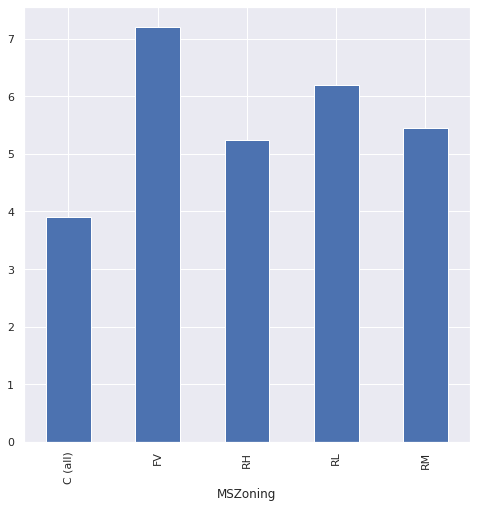

In [660]:
# For MSZoning...
print(train.MSZoning.value_counts(),'/n')

# We will Compare MSZoning with mean of OverallQual and assign a value to missing values depending on the comparison
train.groupby('MSZoning')['OverallQual'].mean().plot.bar()

# Indexes of null values are :455,756,790,1444. 
# Replacing missing values...
test.loc[455,'MSZoning'] = 'C (all)'
test.loc[756,'MSZoning'] = 'C (all)'
test.loc[1444,'MSZoning'] = 'C (all)'
test.loc[790,'MSZoning'] = 'RL'


In [661]:
# For Utilities....
print(total_data.Utilities.value_counts())

# This feature is useless therefore droping it
del train['Utilities']
del test['Utilities']

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [662]:
# For Exterior1st and Exterior2nd....

# Most of the values of these features are same for a record therefore we shall keep only one of them
del train['Exterior2nd']
del test['Exterior2nd']

#filling null value with  most frequent value, ie VinylSd
train.Exterior1st.fillna('VinylSd',inplace = True)
test.Exterior1st.fillna('VinylSd', inplace=True)

total_data.loc[total_data.Exterior1st==total_data.Exterior2nd,['Exterior2nd','Exterior1st']]

,Exterior2nd,Exterior1st
0,VinylSd,VinylSd
1,MetalSd,MetalSd
2,VinylSd,VinylSd
4,VinylSd,VinylSd
5,VinylSd,VinylSd
...,...,...
1447,Plywood,Plywood
1448,Plywood,Plywood
1451,Plywood,Plywood
1456,VinylSd,VinylSd


In [663]:
# For MasVnrType....
x=[]
[x.append(col) for col in train.columns.values if 'MasVnr' in col]

# All except 1 null values in MasVnrType is record of those that dont have masonary veneer. 
# So we are replacing it with none

test.loc[1150,'MasVnrType'] = 'Stone'
test.MasVnrType.fillna('None',inplace=True)
train.MasVnrType.fillna('None',inplace=True)

total_data.loc[total_data.MasVnrType.isna(),x]

,MasVnrType,MasVnrArea
234,NaN,0.0
529,NaN,0.0
650,NaN,0.0
936,NaN,0.0
973,NaN,0.0
977,NaN,0.0
1243,NaN,0.0
1278,NaN,0.0
231,NaN,0.0
246,NaN,0.0


<AxesSubplot:xlabel='MasVnrType'>

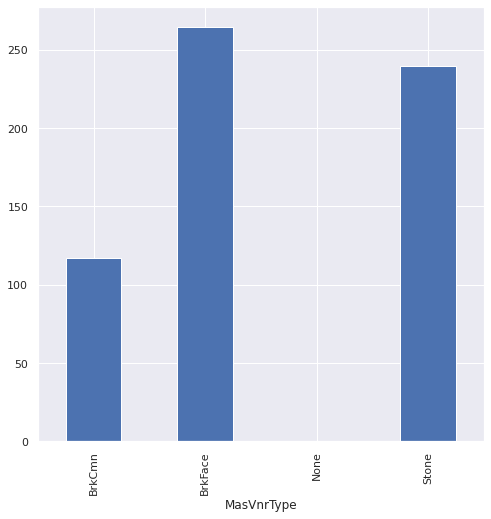

In [664]:
test.groupby('MasVnrType')['MasVnrArea'].mean().plot.bar()

In [665]:
# For basement related features
x=[] 
[x.append(col) for col in train.columns.values if 'Bsmt' in col]

temp = total_data.loc[total_data.BsmtExposure.isna(),x]
temp

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1343,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1344,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1364,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1431,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [666]:
# We will assume that all the null values are from recors that don't have a basement, and fill the with NA
# later we will look into values of 'BsmtUnfSF','BsmtFinSF1','TotalBsmtSF' and 
# if they are not 0 we will reassign corresponding values to other features.

print(temp.isna().sum(),'\n')
temp.describe()

[train[col].fillna('NA',inplace=True) for col in x]
[test[col].fillna('NA',inplace=True) for col in x]
temp.fillna('NA',inplace=True)

BsmtQual        79
BsmtCond        79
BsmtExposure    82
BsmtFinType1    79
BsmtFinSF1       0
BsmtFinType2    79
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64 



In [667]:
indx = (temp[['BsmtUnfSF','BsmtFinSF1','TotalBsmtSF']]>0).any(axis='columns')
temp[indx]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NA,Unf,0.0,Unf,0.0,936.0,936.00000,0.0,0.0
27,Gd,TA,NA,Unf,0.0,Unf,0.0,1595.0,1595.00000,0.0,0.0
660,NA,NA,NA,NA,350.5,NA,0.0,460.0,1046.11797,0.0,0.0
888,Gd,TA,NA,Unf,0.0,Unf,0.0,725.0,725.00000,0.0,0.0


In [668]:
test.loc[660,['BsmtFinType2','BsmtFinType1']] = 'Unf'
test.loc[660,['BsmtCond']] = 'TA'
test.loc[[27,660,888],['BsmtQual','BsmtExposure']] = 'Gd'

train.loc[948,'BsmtExposure'] = 'Gd'

In [669]:
# For Electrical, KitchenQual, Functional, SaleType ....
print(total_data.Electrical.value_counts(),'\n')
print(total_data.KitchenQual.value_counts(),'\n')
print(total_data.Functional.value_counts(),'\n')
print(total_data.SaleType.value_counts(),'\n')

# Replacing null values with most frequent catagory
train.Electrical.fillna('SBrkr',inplace=True)
train.KitchenQual.fillna('TA',inplace=True)
train.SaleType.fillna('WD',inplace=True)

test.Electrical.fillna('SBrkr',inplace=True)
test.KitchenQual.fillna('TA',inplace=True)
test.SaleType.fillna('WD',inplace=True)

# As there is very little records for classes other than 'Typ' in feature ,Functional we will drop it
del train['Functional']
del test['Functional']

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64 

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64 

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64 

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64 



In [670]:
print('train: ',train.isna().sum().mean(),'\n')
print('test : ',test.isna().sum().mean())

train:  0.0 

test :  0.0


### Correlation of features and skewness

In [671]:
continues_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'
 ,'GarageYrBlt','GarageArea','WoodDeckSF','EnclosedPorch','ScreenPorch','MiscVal']

In [672]:
# once again concatinating train and test as we have made changes to many features 
total_data = pd.concat([train.drop(columns='SalePrice'),test],axis='rows')
total_data = total_data[continues_features]
# Fetching correlation of all data and features
corr_matrix = total_data.corr().abs()

# selecting upper part of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# features with > 80% are to be droped
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
corr_matrix[to_drop]


# TotalBsmtSF & 1stFlrSF  have high correlation

,1stFlrSF
LotFrontage,0.387661
LotArea,0.332460
YearBuilt,0.310814
YearRemodAdd,0.242245
MasVnrArea,0.396001
BsmtFinSF1,0.458099
BsmtFinSF2,0.084389
BsmtUnfSF,0.296627
TotalBsmtSF,0.801611
1stFlrSF,1.000000


<AxesSubplot:>

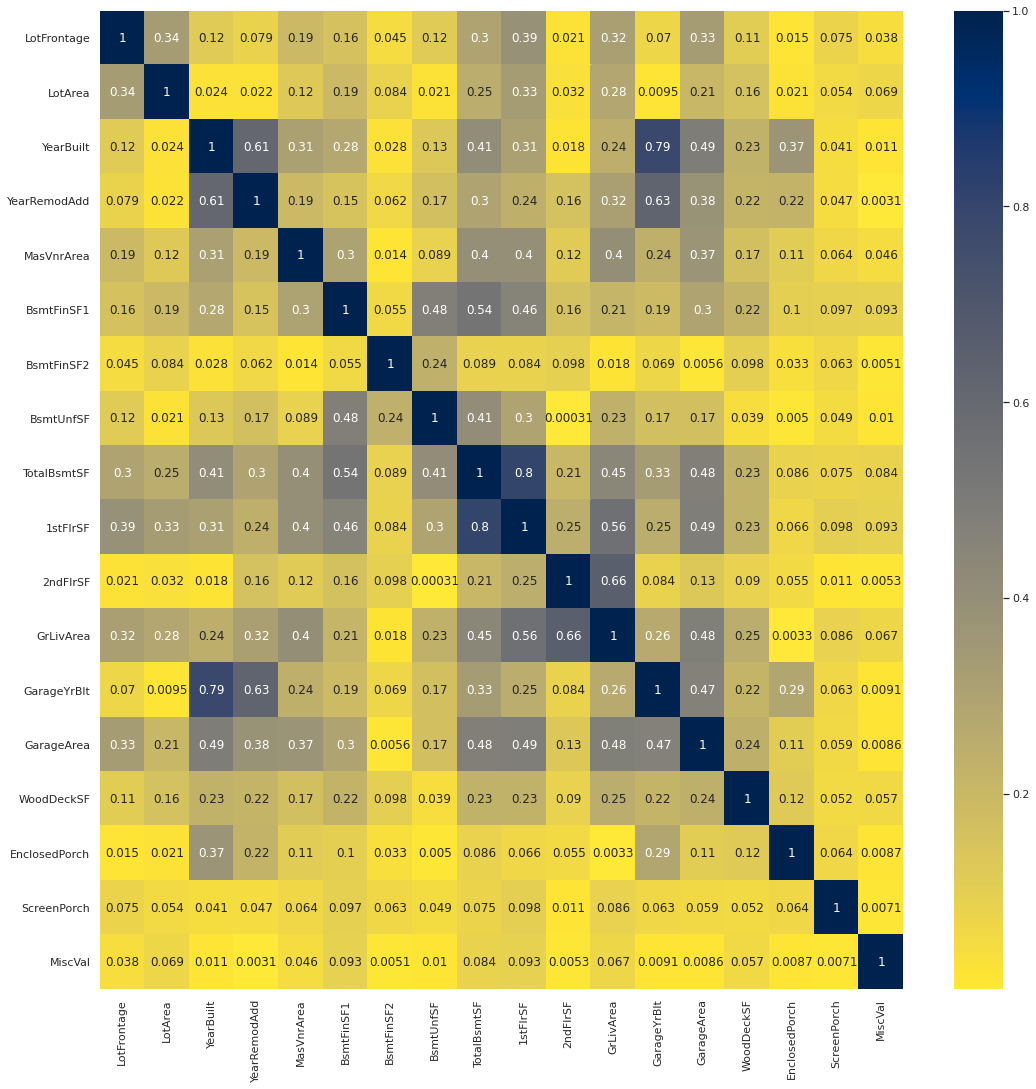

In [673]:
plt.figure(figsize=(18,18))

sns.heatmap(corr_matrix,cmap="cividis_r",annot=True)

In [674]:
# Comparing their correlation with target variable

temp = train[['1stFlrSF', 'TotalBsmtSF' ,'SalePrice']]
temp.corr()['SalePrice']

1stFlrSF       0.607061
TotalBsmtSF    0.615150
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [675]:
# Droping.....
train.drop(columns=['1stFlrSF'],inplace=True)
test.drop(columns=['1stFlrSF'],inplace=True)
total_data.drop(columns=['1stFlrSF'],inplace=True)
corr_matrix.drop(index=['1stFlrSF'],inplace=True)

In [676]:
continues_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','GrLivArea'
 ,'GarageYrBlt','GarageArea','WoodDeckSF','EnclosedPorch','ScreenPorch','MiscVal','SalePrice']

In [677]:
print('skewness\n')
print(train[continues_features].skew(),'\n')

skewness

LotFrontage       0.776568
LotArea          12.207688
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.422479
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
2ndFlrSF          0.813030
GrLivArea         1.366560
GarageYrBlt      -0.678333
GarageArea       -0.007889
WoodDeckSF        1.541376
EnclosedPorch     3.089872
ScreenPorch       4.122214
MiscVal          24.476794
SalePrice         1.729953
dtype: float64 



In [678]:
df = train[continues_features].drop(columns='GarageArea').copy()
for col in df.columns.values:
    if col != 'SalePrice':
        df[col]=np.log(1+df[col])
df['SalePrice']= np.log(df['SalePrice'])

In [679]:
df.skew()

LotFrontage     -1.070463
LotArea         -0.137404
YearBuilt       -0.641129
YearRemodAdd    -0.511005
MasVnrArea       0.502695
BsmtFinSF1      -0.618410
BsmtFinSF2       2.523694
BsmtUnfSF       -2.186504
TotalBsmtSF     -5.154670
2ndFlrSF         0.289643
GrLivArea       -0.006140
GarageYrBlt     -0.701939
WoodDeckSF       0.153537
EnclosedPorch    2.112275
ScreenPorch      3.150409
MiscVal          5.170704
SalePrice        0.105139
dtype: float64

In [680]:
for col in df.columns.values:
    if col != 'SalePrice':
        train[col]=np.log(1+train[col])
        test[col]=np.log(1+test[col])
train['SalePrice']= np.log(train['SalePrice'])

In [681]:
print('corrilation with target variable\n\n') 
print(train[continues_features].corr()['SalePrice'])

corrilation with target variable


LotFrontage      0.344628
LotArea          0.399959
YearBuilt        0.585059
YearRemodAdd     0.566299
MasVnrArea       0.413599
BsmtFinSF1       0.207943
BsmtFinSF2      -0.030246
BsmtUnfSF        0.208419
TotalBsmtSF      0.373040
2ndFlrSF         0.180412
GrLivArea        0.729911
GarageYrBlt      0.494498
GarageArea       0.665030
WoodDeckSF       0.343060
EnclosedPorch   -0.207423
ScreenPorch      0.106172
MiscVal         -0.067077
SalePrice        1.000000
Name: SalePrice, dtype: float64


In [682]:
# Fetching correlation of all data and features
corr_matrix = train[continues_features].corr().abs()
print(corr_matrix.SalePrice.sort_values())

# Droping features with less than .1 correlation with target variable
to_drop = corr_matrix.loc[corr_matrix.SalePrice<.2,'SalePrice'].index.values

train.drop(columns=to_drop,inplace=True)
test.drop(columns=to_drop,inplace=True)
total_data.drop(columns=to_drop,inplace=True)

BsmtFinSF2       0.030246
MiscVal          0.067077
ScreenPorch      0.106172
2ndFlrSF         0.180412
EnclosedPorch    0.207423
BsmtFinSF1       0.207943
BsmtUnfSF        0.208419
WoodDeckSF       0.343060
LotFrontage      0.344628
TotalBsmtSF      0.373040
LotArea          0.399959
MasVnrArea       0.413599
GarageYrBlt      0.494498
YearRemodAdd     0.566299
YearBuilt        0.585059
GarageArea       0.665030
GrLivArea        0.729911
SalePrice        1.000000
Name: SalePrice, dtype: float64


In [683]:
print('train: ',train.shape,'\n')
print('test : ',test.shape)

train:  (1460, 69) 

test :  (1459, 68)


### Encoding and Analizing catagorical features

In [684]:
total_data = pd.concat([train.drop(columns='SalePrice'),test],axis='rows')
total_data.shape

(2919, 68)

In [685]:
na_columns = list(na_columns)
[na_columns.remove(x) for x in ['Utilities','Exterior2nd','BsmtFinSF2','BsmtHalfBath','Functional','GarageArea']]
print()

In [686]:
obj_feaure = total_data.select_dtypes(include='O').columns
col_names=[]

for feature in obj_feaure:
    count = total_data[feature].value_counts()
    
    # Finding names of features that has catagories with less records than 1% entire data
    if any(count<=count.sum()*0.01):
        col_names.append(feature)
    

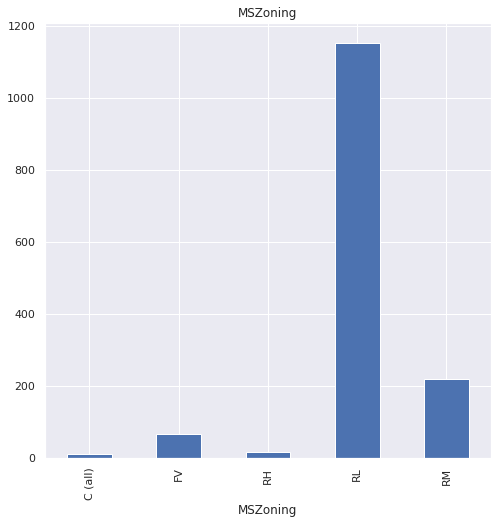

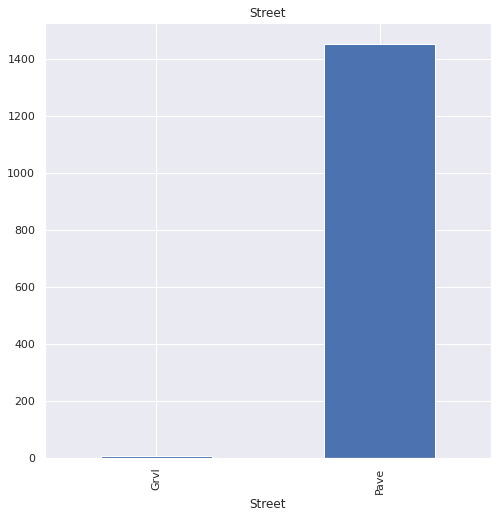

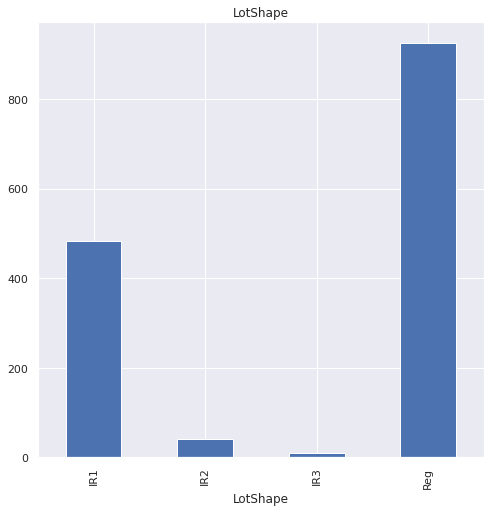

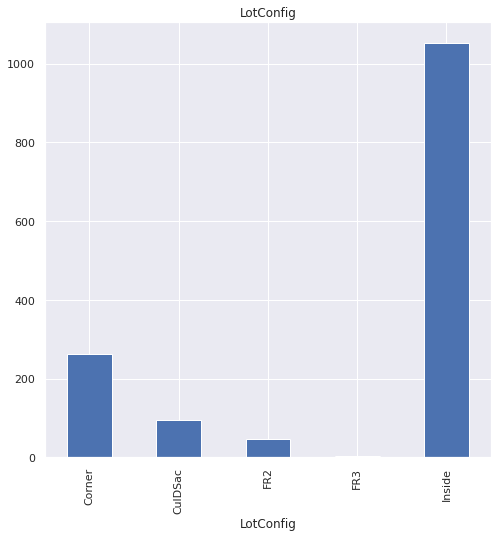

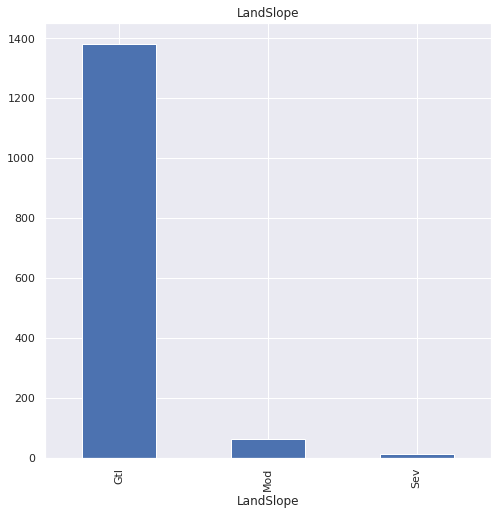

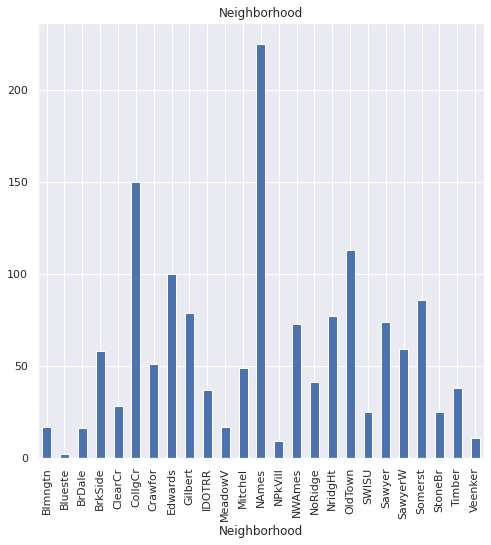

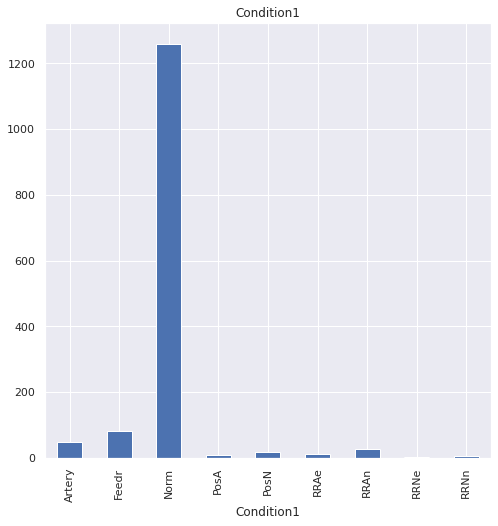

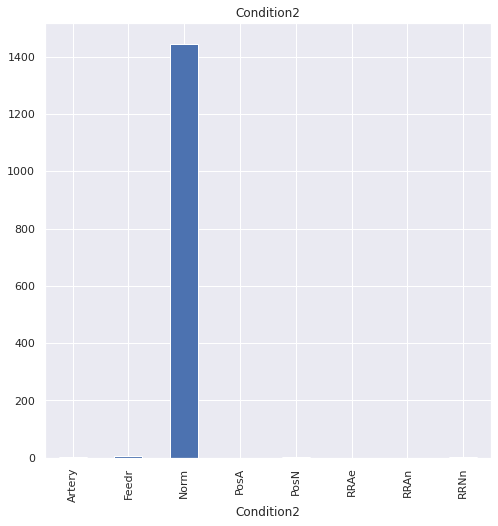

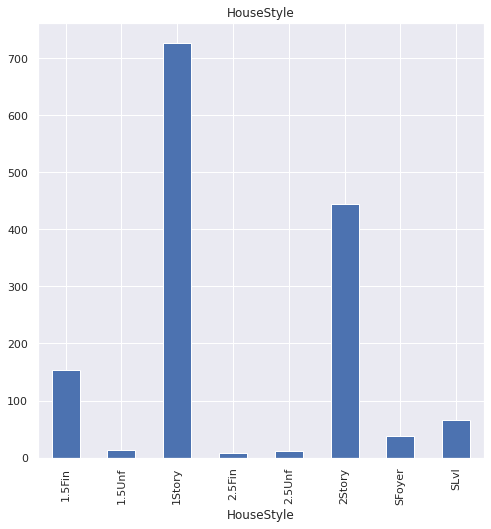

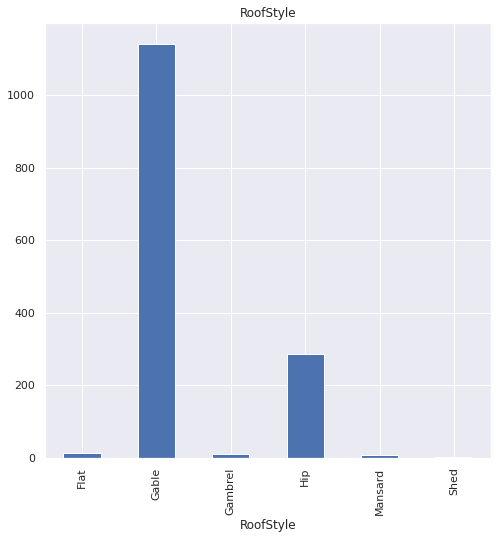

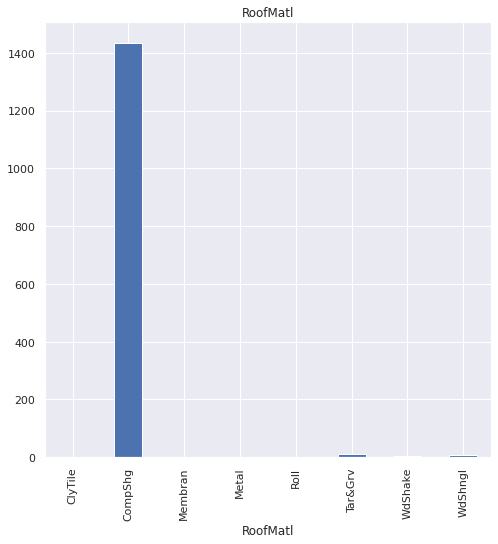

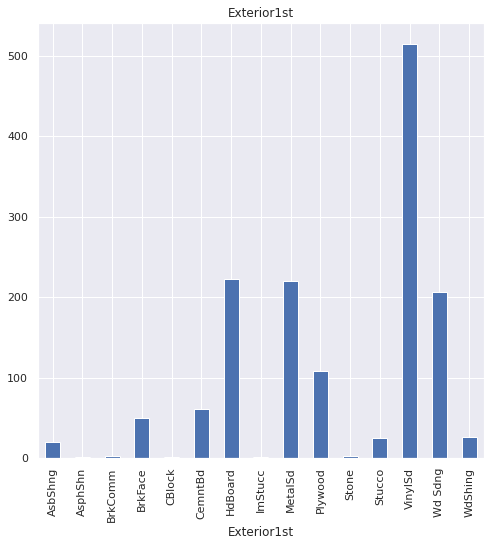

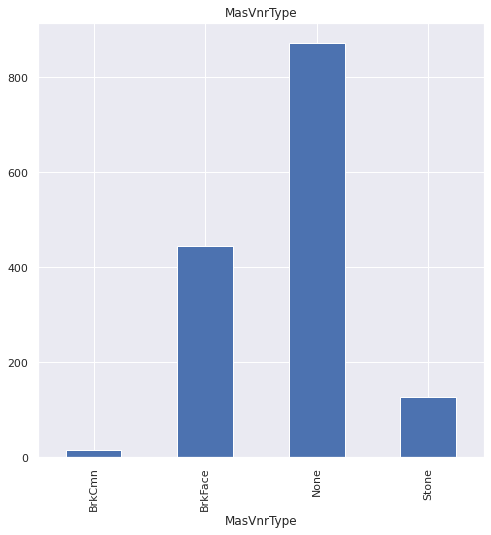

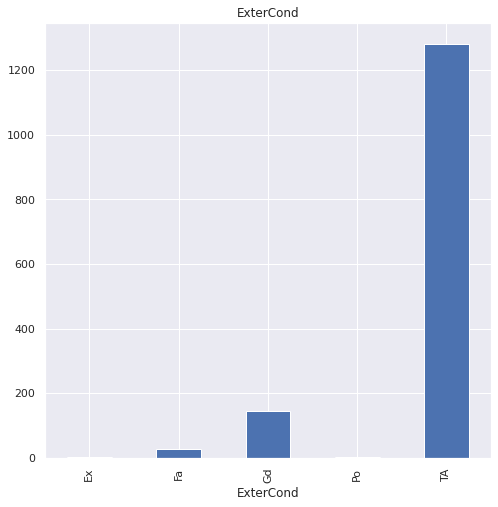

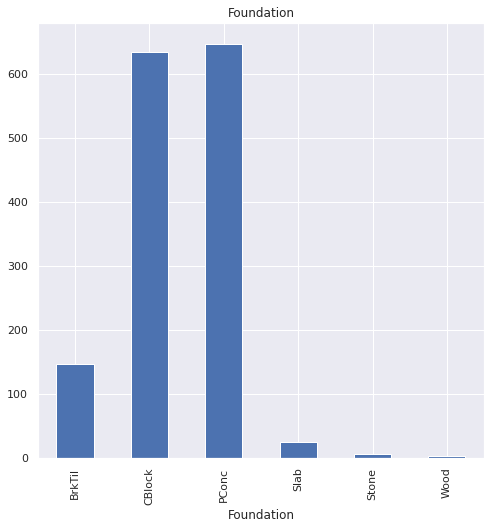

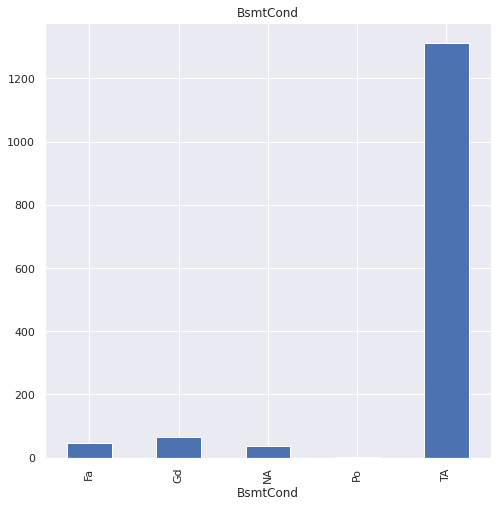

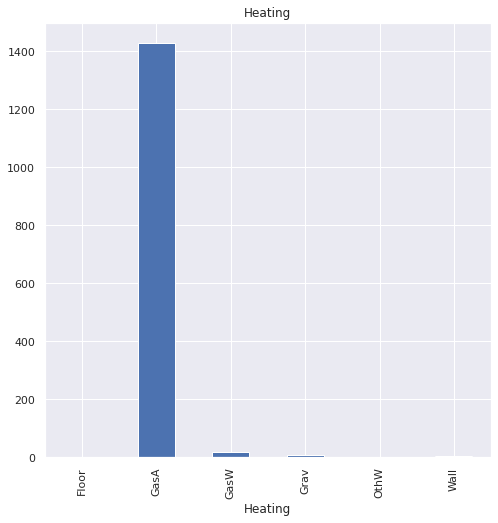

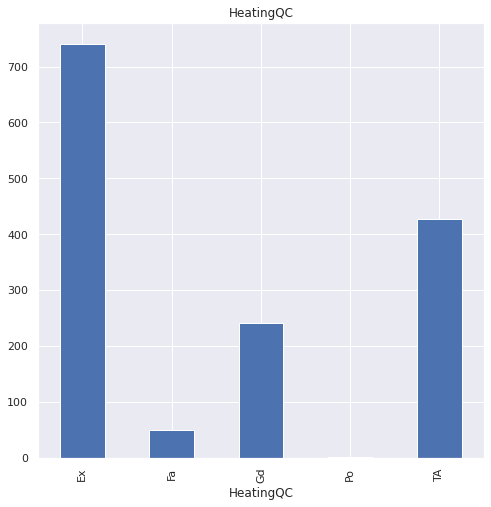

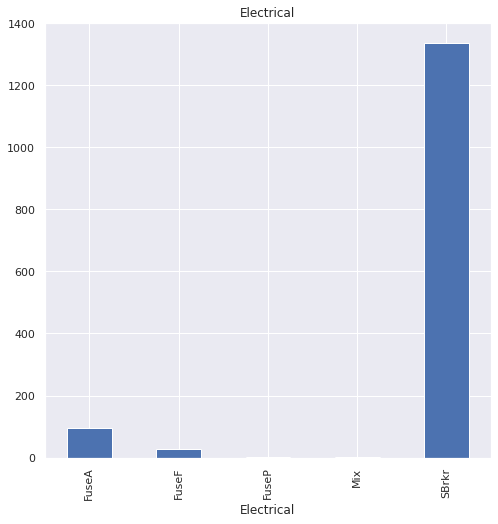

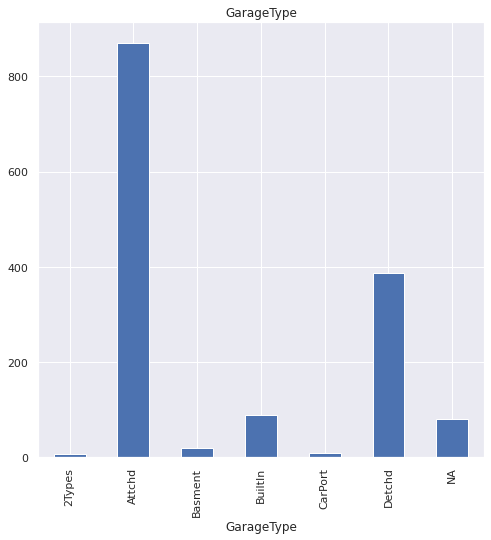

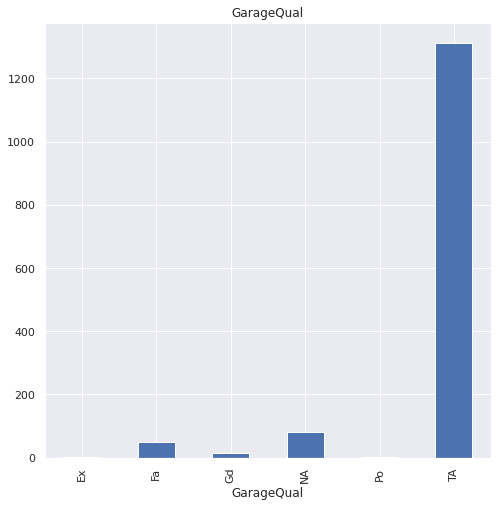

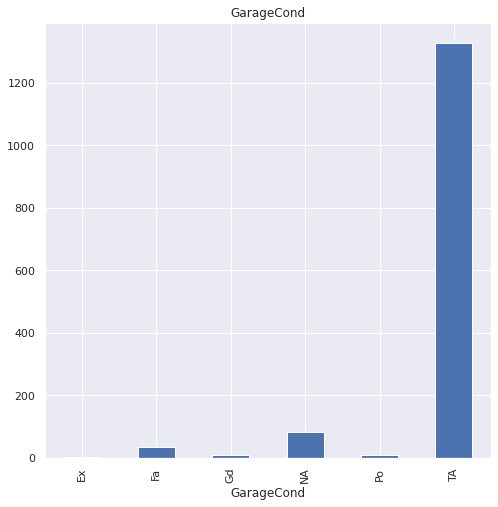

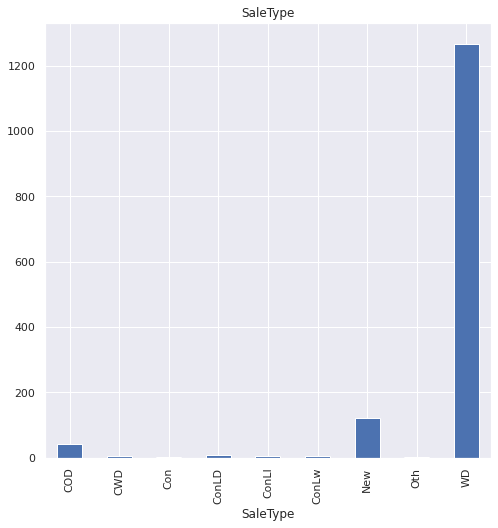

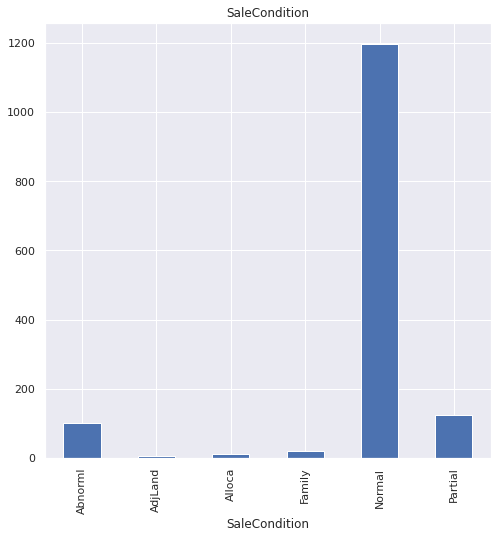

In [687]:
# ploting to see the distribution of classes in these features
for feature in col_names:
    data = train.copy()
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].count().plot.bar()
    plt.title(feature)
    plt.show()

In [688]:
# 'Street','LandSlope','Condition2','RoofMatl','Heating' will not provide the model any value 
# therefore dropng these

train.drop(columns=['Street','LandSlope','Condition2','RoofMatl','Heating'],inplace=True) 
test.drop(columns=['Street','LandSlope','Condition2','RoofMatl','Heating'],inplace=True) 
total_data.drop(columns=['Street','LandSlope','Condition2','RoofMatl','Heating'],inplace=True) 

In [689]:
def combine(value,col_name):
    train.loc[train[col_name]==value, col_name] = 'new_type'
    test.loc[test[col_name]==value, col_name] = 'new_type' 
    total_data.loc[total_data[col_name]==value, col_name] = 'new_type'

In [690]:
obj_feaure = total_data.select_dtypes(include='O').columns
features_changed =[]

for feature in obj_feaure:
    count = total_data[feature].value_counts()
    
    # Finding names of classes with less records than 3% of its highest class
    catagory = count[count<=count.sum()*0.03].index.values
    if len(catagory)>0:
        # calling function to assign these classes into a new class
        [combine(value, feature) for value in catagory]
        features_changed.append(feature)

In [691]:
total_data[features_changed].head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,NA,Attchd,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,new_type,new_type,Feedr,1Fam,1Story,Gable,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,SBrkr,TA,TA,Attchd,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,SBrkr,Gd,TA,Attchd,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,SBrkr,Gd,Gd,Detchd,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,new_type,new_type,Norm,1Fam,2Story,Gable,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,SBrkr,Gd,TA,Attchd,TA,TA,Y,WD,Normal


In [692]:
numerical_features = train.select_dtypes(exclude='O').columns

In [693]:
# finding features with 3 or less catagories
obj_feaure = total_data.select_dtypes(include='O').columns
col_dummies = []

for feature in obj_feaure:
    count = total_data[feature].value_counts()

    if len(count)<4:
        col_dummies.append(feature)
col_dummies

['LotShape',
 'RoofStyle',
 'ExterCond',
 'BsmtFinType2',
 'CentralAir',
 'Electrical',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [694]:
# creating dummy variables 

df = pd.get_dummies(train[col_dummies],drop_first=True)
train = pd.concat([train,df],axis='columns')

df = pd.get_dummies(test[col_dummies],drop_first=True)
test = pd.concat([test,df],axis='columns')

In [695]:
test.drop(columns=col_dummies,inplace=True)
train.drop(columns=col_dummies,inplace=True)
total_data.drop(columns=col_dummies,inplace=True)

In [696]:
# encoding rest of the variables w.r.t their relation with target variable
categorical_features = train.select_dtypes(include='O')

for feature in categorical_features:
    labels_ordered=train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)
    test[feature]=test[feature].map(labels_ordered)

In [697]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleCondition,LotShape_Reg,LotShape_new_type,RoofStyle_Hip,RoofStyle_new_type,ExterCond_TA,ExterCond_new_type,BsmtFinType2_Unf,BsmtFinType2_new_type,CentralAir_Y,Electrical_SBrkr,Electrical_new_type,GarageCond_TA,GarageCond_new_type,PavedDrive_Y,PavedDrive_new_type,SaleType_WD,SaleType_new_type
0,1461,20,0,4.394449,9.360741,1,0,5,1,3,2,5,6,7.581720,7.581720,6,1,0.000000,1,2,2,2,1,1,6.150603,5.602119,6.783325,2,0,6.799056,0.0,0.0,1,0,2,1,1,5,0,0,3,7.581720,1,1.0,730.0,2,4.948760,0,0.0,0,0,6,2010,2,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0
1,1462,20,2,4.406719,9.565775,1,1,5,2,3,2,6,6,7.580189,7.580189,0,2,4.691348,1,2,2,2,1,4,6.828712,6.008813,7.192934,2,0,7.192934,0.0,0.0,1,1,3,1,2,6,0,0,3,7.580189,1,1.0,312.0,2,5.976351,36,0.0,0,0,6,2010,2,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0
2,1463,60,2,4.317488,9.534668,1,0,9,2,3,4,5,5,7.599902,7.600402,6,1,0.000000,1,3,3,2,1,6,6.674561,4.927254,6.834109,3,0,7.396335,0.0,0.0,2,1,3,1,1,6,1,2,3,7.599902,3,2.0,482.0,2,5.361292,34,0.0,0,0,3,2010,2,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
3,1464,60,2,4.369448,9.208238,1,0,9,2,3,4,6,6,7.600402,7.600402,6,2,3.044522,1,3,2,2,1,6,6.401917,5.783825,6.831954,4,0,7.380879,0.0,0.0,2,1,3,1,2,7,1,3,3,7.600402,3,2.0,470.0,2,5.888878,36,0.0,0,0,6,2010,2,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
4,1465,120,2,3.784190,8.518392,3,0,12,2,4,2,8,5,7.597396,7.597396,3,1,0.000000,2,3,3,2,1,4,5.575949,6.925595,7.155396,4,0,7.155396,0.0,0.0,2,0,2,1,2,5,0,0,3,7.597396,2,2.0,506.0,2,0.000000,82,0.0,0,0,1,2010,2,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1,3.091042,7.568896,1,0,12,2,1,4,4,7,7.586296,7.586296,5,1,0.000000,1,2,2,2,1,5,0.000000,6.304449,6.304449,3,0,6.996681,0.0,0.0,1,1,3,1,1,5,0,0,0,7.590852,0,0.0,0.0,0,0.000000,0,0.0,0,0,6,2006,2,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0
1455,2916,160,1,3.091042,7.546974,1,0,12,2,4,4,4,5,7.586296,7.586296,5,1,0.000000,1,2,2,2,1,1,5.533389,5.686975,6.304449,2,0,6.996681,0.0,0.0,1,1,3,1,1,6,0,0,2,7.586296,1,1.0,286.0,2,0.000000,24,0.0,0,0,4,2006,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
1456,2917,20,2,5.081404,9.903538,1,0,6,2,3,2,5,7,7.581210,7.599401,6,1,0.000000,1,2,2,2,1,4,7.110696,0.000000,7.110696,4,0,7.110696,1.0,0.0,1,0,4,1,1,7,1,2,1,7.581210,1,2.0,576.0,2,6.163315,0,0.0,0,0,9,2006,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
1457,2918,85,2,4.143135,9.253591,1,0,6,2,3,1,5,5,7.597396,7.597396,3,1,0.000000,1,3,3,2,3,6,5.823046,6.356108,6.816736,2,0,6.878326,0.0,1.0,1,0,3,1,1,6,0,0,0,7.590852,0,0.0,0.0,0,4.394449,32,0.0,0,0,7,2006,2,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0


### Testing manual removal of features by considering p values and the using LinearRegression

In [698]:
import statsmodels.api as sn
x = sn.add_constant(train.drop(columns=['SalePrice','Id']))


In [699]:
lm = sn.OLS(train.SalePrice,train.drop(columns=['SalePrice','Id'])).fit()

In [700]:
pvalues = lm.pvalues.sort_values(ascending=False)
pvalues = pvalues[pvalues<0.05]
features = pvalues.index.values

In [701]:
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
le = LinearRegression()

In [702]:
px_train = scaler.fit_transform(train.drop(columns=['SalePrice','Id']).loc[:,features])
px_test  = scaler.fit_transform(test.drop(columns='Id').loc[:,features])
py_train = train['SalePrice']

In [703]:
#gbr.fit(x_train, y_train)
le.fit(px_train, py_train)

LinearRegression()

In [704]:
y_pred = le.predict(px_test)
y_pred = np.expm1(y_pred)
y_pred = pd.DataFrame(y_pred,columns=['SalePrice'])
y_pred = pd.concat([Id,y_pred],axis=1)
y_pred

,Id,SalePrice
0,1461,108562.374128
1,1462,157387.809416
2,1463,173242.924112
3,1464,199812.416242
4,1465,190804.290310
...,...,...
1454,2915,95572.816918
1455,2916,87663.365395
1456,2917,168356.076911
1457,2918,118868.086485


In [705]:
pd.DataFrame.to_csv(y_pred,'House Prices - Advanced Regression Techniques - Submission - pvalue.csv',index=False)

### Feature selection

In [706]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [707]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(train.drop(columns=['SalePrice','Id']), train['SalePrice'])
feature_sel_model.get_support()

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [708]:
train.drop(columns=['SalePrice','Id']).loc[:,feature_sel_model.get_support()]

,MSSubClass,MSZoning,LotArea,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,Exterior1st,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,HeatingQC,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,YrSold,SaleCondition
0,60,2,9.042040,0,10,2,7,5,6,5.283204,3,3,1,6,6.561031,4,0,7.444833,1,2,2,8,0,0,3,2,548,0.000000,61,0.000000,0,2008,2
1,20,2,9.169623,2,12,1,6,8,1,0.000000,2,3,4,4,6.886532,4,0,7.141245,0,2,1,6,1,2,3,2,460,5.700444,0,0.000000,0,2007,2
2,60,2,9.328212,0,10,2,7,5,6,5.093750,3,3,2,6,6.188264,4,0,7.488294,1,2,2,6,1,2,3,2,608,0.000000,42,0.000000,0,2008,2
3,70,2,9.164401,1,11,2,7,5,0,0.000000,1,2,1,4,5.379897,3,0,7.448916,1,1,2,7,1,3,1,1,642,0.000000,35,5.609472,0,2006,0
4,60,2,9.565284,2,12,2,8,5,6,5.860786,3,3,3,6,6.486161,4,0,7.695758,1,2,2,9,1,2,3,2,836,5.262690,84,0.000000,0,2008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,2,8.976894,0,9,2,6,5,6,0.000000,3,3,1,5,0.000000,4,0,7.407318,0,2,1,7,1,2,3,2,460,0.000000,40,0.000000,0,2007,2
1456,20,2,9.486152,0,8,2,6,6,4,4.787492,2,3,1,4,6.673298,2,0,7.637234,1,2,1,7,2,2,3,1,500,5.857933,0,0.000000,0,2010,2
1457,70,2,9.109746,0,11,2,7,9,5,0.000000,0,2,1,6,5.620401,4,0,7.758333,0,2,2,9,2,3,3,2,252,0.000000,60,0.000000,0,2010,2
1458,20,2,9.181735,0,5,2,5,6,1,0.000000,2,2,2,6,3.912023,3,0,6.983790,1,1,2,5,0,0,3,1,240,5.905362,0,4.727388,0,2010,2


## Standadization and Model Building

In [709]:
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

In [710]:
x_train = scaler.fit_transform(train.drop(columns=['SalePrice','Id']).loc[:,feature_sel_model.get_support()])
x_test  = scaler.fit_transform(test.drop(columns='Id').loc[:,feature_sel_model.get_support()])
y_train = train['SalePrice']

In [ ]:
SEED = 1
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
le = LinearRegression()
krr = KernelRidge(alpha=0.6,degree=2,kernel='polynomial',coef0=2.5)

In [714]:
krr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
le.fit(x_train, y_train)

LinearRegression()

In [717]:
y_pred = gbr.predict(x_test)
y_pred = np.expm1(y_pred)
y_pred = pd.DataFrame(y_pred,columns=['SalePrice'])
y_pred = pd.concat([Id,y_pred],axis=1)
y_pred

,Id,SalePrice
0,1461,120517.179663
1,1462,162777.187259
2,1463,187720.191808
3,1464,192064.050627
4,1465,191227.444229
...,...,...
1454,2915,87154.415214
1455,2916,83653.170836
1456,2917,166565.664409
1457,2918,117285.959334


In [718]:
pd.DataFrame.to_csv(y_pred,'House Prices - Advanced Regression Techniques - Submission.csv',index=False)